# Coolant Properties

This notebook is dedicated to analysing the coolant properties that are used in the full code of our solver.

The main properties we need to model are:
- $\rho(P, T)$ - coolant density
- $C_p (P, T)$ - coolant specific heat (at constant pressure)
- $k(P, T)$ - thermal conductivity 
- $\mu(P, T)$ - viscosity 

Some useful resources to reference are:
- [List of CoolProp Parameters](http://coolprop.org/coolprop/HighLevelAPI.html#parameter-table)

### Using CoolProp

In [11]:
from CoolProp.CoolProp import PropsSI

import matplotlib.pyplot as plt
import numpy as np

In [12]:
coolant_name = "NITROUSOXIDE"
T = 300 # K
p = 2.758e+6 # Pa

### Define Transport Property Functions for Coolant
One option to define coolant properties as functions of T and P through CoolProp (<em>that only has values for density and specific heat at constant pressure</em>) is to use as one of the parameters the [Molar Vapor Quality](https://en.wikipedia.org/wiki/Vapor_quality) $Q$ of the coolant. (<em>We want to assume our coolant remains a liquid throughout the coolant channels</em>).

In [13]:
# Q = 0, P - independent variable
def rho_Q0_P(P):
    return PropsSI('DMASS','P', P, 'Q', 0, coolant_name)

def cp_Q0_P(P):
    return PropsSI('CPMASS','P', P, 'Q', 0, coolant_name)

def T_Q0_P(P):
    return PropsSI('T','P', P, 'Q', 0, coolant_name)

# Q = 0, T - independent variable
def rho_Q0_T(T):
    return PropsSI('DMASS','T', T, 'Q', 0, coolant_name)

def cp_Q0_T(T):
    return PropsSI('CPMASS','T', T, 'Q', 0, coolant_name)

def P_Q0_T(T):
    return PropsSI('P','T', T, 'Q', 0, coolant_name)

# define density and cp as a function of pressure and temperature
def rho(P, T):
    return PropsSI('DMASS','P', P, 'T', T, coolant_name)

def cp(P, T):
    return PropsSI('CPMASS','P', P, 'T', T, coolant_name)



Plotting $\rho$ and $C_p$ <em>as a function of pressure P</em> for $Q = 0$ (<em>pure liquid</em>).

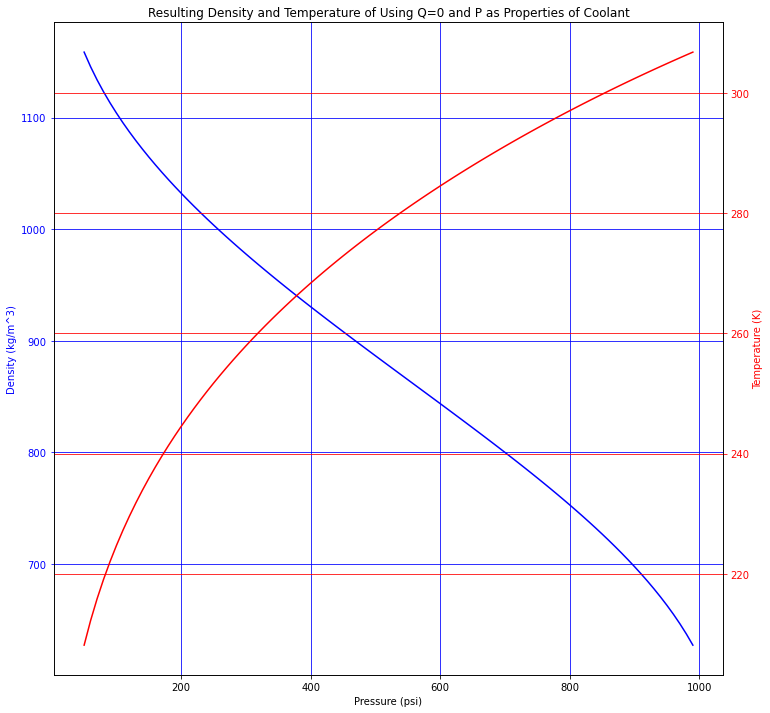

In [14]:
# plot the density and cp as a function of pressure over a range of pressure from 50 psi to 1000 psi
# also plot on the same plot using a double y-axis the temperature using the properties P and Q = 0
# pressure in psi
p_min = 50*6894.76 # Pa
p_max = 1000*6894.76 # Pa
p_step = 10*6894.76 # Pa

p_range = np.arange(p_min, p_max, p_step)
rho_range = np.zeros(len(p_range))
cp_range = np.zeros(len(p_range))
T_range = np.zeros(len(p_range))

for i in range(len(p_range)):
    rho_range[i] = rho_Q0_P(p_range[i])
    cp_range[i] = cp_Q0_P(p_range[i])
    T_range[i] = T_Q0_P(p_range[i])

fig, ax1 = plt.subplots(figsize=(12, 12))
fig.set_facecolor('white')
ax1.plot(p_range/6894.76, rho_range, 'b-')
ax1.set_xlabel('Pressure (psi)')
ax1.set_ylabel('Density (kg/m^3)', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(color='b')
ax1.set_title('Resulting Density and Temperature of Using Q=0 and P as Properties of Coolant')

ax2 = ax1.twinx()
ax2.plot(p_range/6894.76, T_range, 'r-')
ax2.set_ylabel('Temperature (K)', color='r')
ax2.tick_params('y', colors='r')
ax2.grid(color='r')
plt.show()






Plotting $\rho$ and $C_p$ <em>as a function of temperature T</em> for $Q = 0$ (<em>pure liquid</em>).

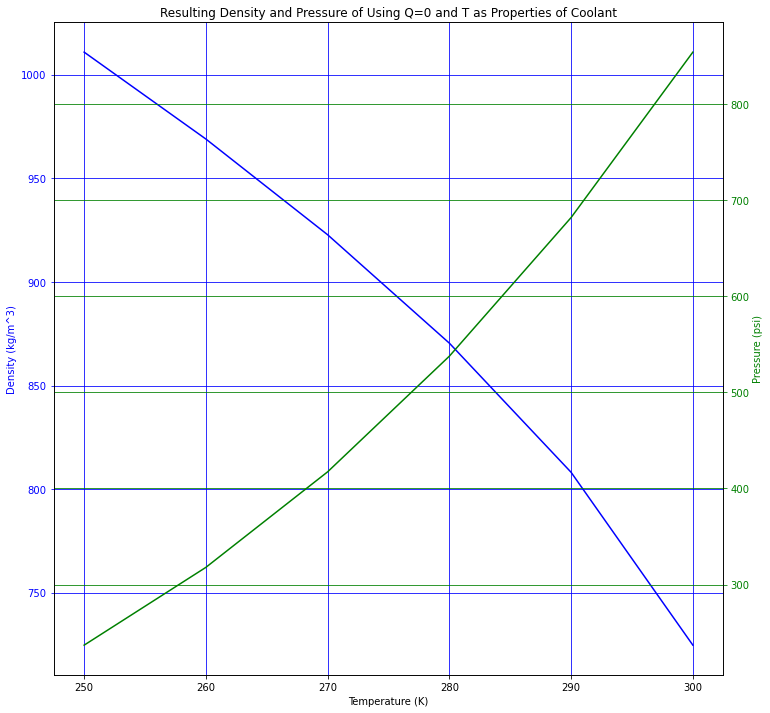

In [15]:
# plot the density and cp as a function of temperature over a range of temperature from 200 K to 300 K
# also plot on the same plot using a double y-axis the pressure using the properties T and Q = 0

# temperature in K
T_min = 250 # K
T_max = 305 # K
T_step = 10 # K

T_range = np.arange(T_min, T_max, T_step)
rho_range = np.zeros(len(T_range))
cp_range = np.zeros(len(T_range))
P_range = np.zeros(len(T_range))

for i in range(len(T_range)):
    rho_range[i] = rho_Q0_T(T_range[i])
    cp_range[i] = cp_Q0_T(T_range[i])
    P_range[i] = P_Q0_T(T_range[i])

fig, ax1 = plt.subplots(figsize=(12, 12))
fig.set_facecolor('white')
ax1.plot(T_range, rho_range, 'b-')
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Density (kg/m^3)', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(color='b')
ax1.set_title('Resulting Density and Pressure of Using Q=0 and T as Properties of Coolant')

ax2 = ax1.twinx()
ax2.plot(T_range, P_range/6894.76, 'g-')
ax2.set_ylabel('Pressure (psi)', color='g')
ax2.tick_params('y', colors='g')
ax2.grid(color='g')
plt.show()


#### Conclusions about using Q = 0 as a parameter
While it may seem that setting $Q = 0$ inforces our coolant to be a liquid in the model, that also drives the other property (either T or P) and this property does not match th eone used in our models.

In other words, using a different property won't change the physical model. If the model says that the liquid will boil at certain conditions, then it will. <b>Therefore, we must still use $T$ and $P$ as our driving parameters</b>.

#### CoolProp Prediceted Coolant Properties Changing T and P

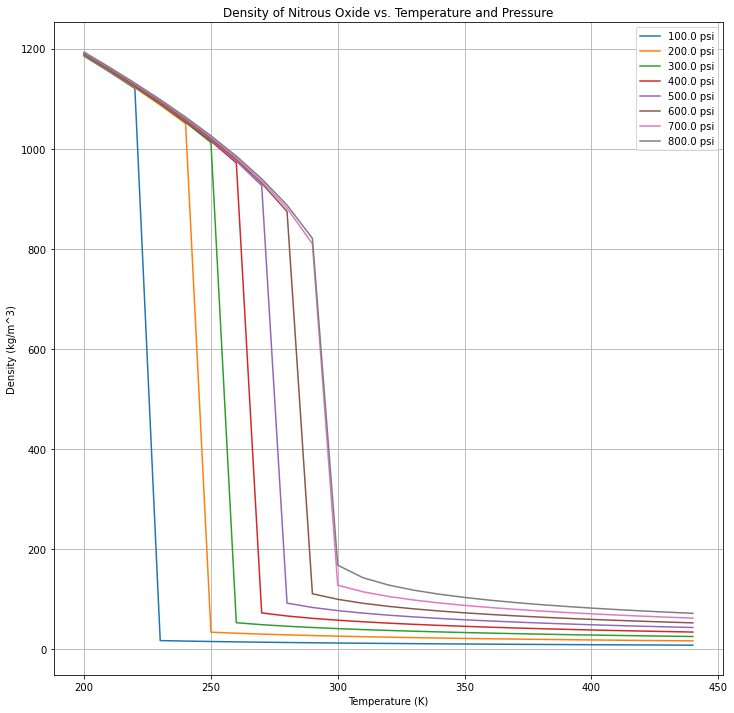

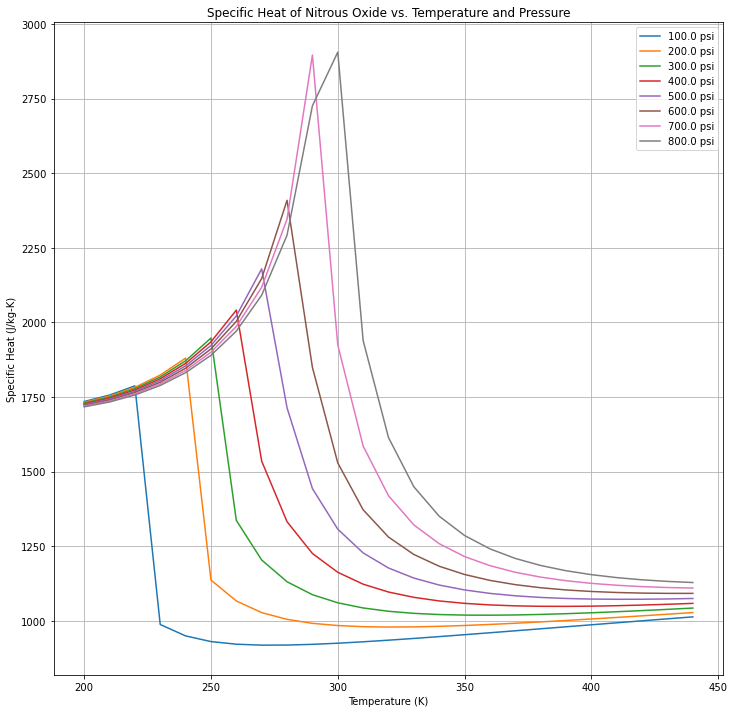

"\n# plot Q vs. T for P = 100 psi, 200 psi, 300 psi, 400 psi, 500 psi, 600 psi\n# pressure in psi\ndef Q(P, T):\n    return PropsSI('Q','P', P, 'T', T, coolant_name)\n\nQ_range = np.zeros(len(T_range))\n\nfig = plt.figure(figsize=(12, 12))\nfig.set_facecolor('white')\nfor j in range(len(p_range)):\n    for i in range(len(T_range)):\n        Q_range[i] = Q(p_range[j], T_range[i])\n    plt.plot(T_range, Q_range, label = str(p_range[j]/6894.76) + ' psi', color = 'C{}'.format(j))\nplt.xlabel('Temperature (K)')\nplt.ylabel('Vapor Quality')\nplt.title('Vapor Quality of Nitrous Oxide vs. Temperature and Pressure')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

In [16]:
# plot density and cp as a function of temperature over a range of temperature from 200 K to 400 K at pressures of 100 psi, 200 psi, 300 psi, 400 psi, 500 psi, 600 psi
# pressure in psi
T_min = 200 # K
T_max = 450 # K
T_step = 10 # K

T_range = np.arange(T_min, T_max, T_step)
rho_range = np.zeros(len(T_range))
cp_range = np.zeros(len(T_range))

p_range = np.array([100, 200, 300, 400, 500, 600, 700, 800])*6894.76 # Pa


fig = plt.figure(figsize=(12, 12))
fig.set_facecolor('white')
for j in range(len(p_range)):
    for i in range(len(T_range)):
        rho_range[i] = rho(p_range[j], T_range[i])
        cp_range[i] = cp(p_range[j], T_range[i])
    plt.plot(T_range, rho_range, label = str(p_range[j]/6894.76) + ' psi',  color = 'C{}'.format(j))
plt.xlabel('Temperature (K)')
plt.ylabel('Density (kg/m^3)')
plt.title('Density of Nitrous Oxide vs. Temperature and Pressure')
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12, 12))
fig.set_facecolor('white')
for j in range(len(p_range)):
    for i in range(len(T_range)):
        rho_range[i] = rho(p_range[j], T_range[i])
        cp_range[i] = cp(p_range[j], T_range[i])
    plt.plot(T_range, cp_range, label = str(p_range[j]/6894.76) + ' psi', color = 'C{}'.format(j))
plt.xlabel('Temperature (K)')
plt.ylabel('Specific Heat (J/kg-K)')
plt.title('Specific Heat of Nitrous Oxide vs. Temperature and Pressure')
plt.legend()
plt.grid(True)
plt.show()

'''
# plot Q vs. T for P = 100 psi, 200 psi, 300 psi, 400 psi, 500 psi, 600 psi
# pressure in psi
def Q(P, T):
    return PropsSI('Q','P', P, 'T', T, coolant_name)

Q_range = np.zeros(len(T_range))

fig = plt.figure(figsize=(12, 12))
fig.set_facecolor('white')
for j in range(len(p_range)):
    for i in range(len(T_range)):
        Q_range[i] = Q(p_range[j], T_range[i])
    plt.plot(T_range, Q_range, label = str(p_range[j]/6894.76) + ' psi', color = 'C{}'.format(j))
plt.xlabel('Temperature (K)')
plt.ylabel('Vapor Quality')
plt.title('Vapor Quality of Nitrous Oxide vs. Temperature and Pressure')
plt.legend()
plt.grid(True)
plt.show()
'''

### Using Antoine Equation to Estimate Vapor Pressure of Nitrous
The [Antoine equation](https://en.wikipedia.org/wiki/Antoine_equation#:~:text=The%20Antoine%20equation%20is%20a,Antoine%20(1825%E2%80%931897).) is a class of semi-empirical correlations describing the relation between vapor pressure and temperature for pure substances. Given the values of $A$, $B$, $C$, and $D$ we can obtain a relation between pressure $P$ and temperature $T$ as ${\displaystyle \log _{10}P=A-{\frac {B}{C+T}}}$. Yet, from data foun up until now, these parameters are only defined for Nitrous in the temperature range form $129.8 K$ to $187.7 K$.

In addition to this, we suplement the curve with data found from other sources (<em>e.g. Aspire Space paper on $N_2O Physics$</em>), as well as include the critical point.

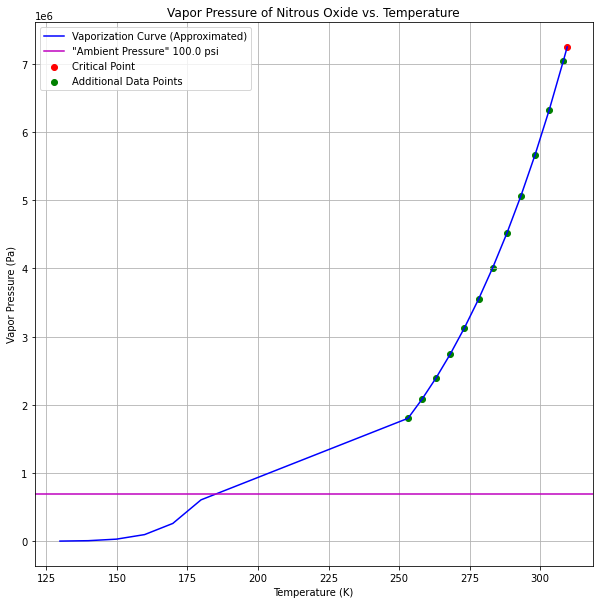

In [22]:
# define Antoine Equation Parameters for Nitrous Oxide (coefficients defined for [P] = bar and [T] = K)
A = 4.37799
B = 621.077
C = -44.659

# define critical temperature and pressure for Nitrous
T_c = 309.57 # K
p_c = 7.245e6 # Pa (about 1050 psi)

# define the vapor pressure as a function of temperature
def P_vapor_Antoine(T):
    return 10**(A - B/(T + C)) * 1e6 # convert from bar to Pa

T_range = np.arange(129.8, 187.7, 10)
P_vapor_range = np.zeros(len(T_range))
for i in range(len(T_range)):
    P_vapor_range[i] = P_vapor_Antoine(T_range[i])

# using the points obtained from the Antoine Equation, points form other data and the Critical Point, extrapolate the vaporization curve
T_add_data = np.array([253.15, 258.15, 263.15, 268.15, 273.15, 278.15, 283.15, 288.15, 293.15, 298.15, 303.15, 308.15])
P_vapor_add_data = np.array([18.01, 20.83, 23.97, 27.44, 31.27, 35.47, 40.07, 45.10, 50.60, 56.60, 63.15, 70.33]) * 1e5 # convert from bar to Pa

T_range = np.append(T_range, T_add_data)
P_vapor_range = np.append(P_vapor_range, P_vapor_add_data)
T_range = np.append(T_range, T_c)
P_vapor_range = np.append(P_vapor_range, p_c)

# plot the vapor pressure as a function of temperature
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
plt.plot(T_range, P_vapor_range, 'b-', label='Vaporization Curve (Approximated)')
plt.xlabel('Temperature (K)')
plt.ylabel('Vapor Pressure (Pa)')
plt.title('Vapor Pressure of Nitrous Oxide vs. Temperature')
plt.grid(True)
# plot the critical temperature and pressure
plt.scatter(T_c, p_c, color='r', label='Critical Point')
plt.scatter(T_add_data, P_vapor_add_data, color='g', label='Additional Data Points')

# plot some ambient pressure
p_ambient = 100 * 6894.76 # Pa
plt.axhline(y=p_ambient, color='m', linestyle='-', label='\"Ambient Pressure\" {}'.format(str(p_ambient / 6894.76)) + " psi")
plt.legend()
plt.show()


### Comparison of Cantera vs CoolProp

In [18]:
import cantera as ct
# Set up the coolant transport properties using Cantera
coolant = ct.Solution('gri30.yaml')
coolant.TPY = 298.15, p, "N2O:1" # defining starting conditions for coolant to be at chamber pressure and standard ambient temperature

def rho_coolant_can(Ti, p):
    coolant.TP = Ti, p
    return coolant.density_mass

def rho_coolant_cool(Ti, p):
    return PropsSI("D", "Q", 0, "P", p, coolant_name)

def cp_coolant_can(Ti, p):
    return PropsSI("CPMASS", "T", Ti, "P", p, coolant_name)

def cp_coolant_cool(Ti, p):
    coolant.TP = Ti, p
    return coolant.cp * coolant.viscosity / coolant.thermal_conductivity


rho_can = list()
rho_cool = list()

cp_can = list()
cp_cool = list()

T_list = range(300)[200:]
for i in T_list:
    rho_can.append(rho_coolant_can(i, p))
    rho_cool.append(rho_coolant_cool(i, p))
    cp_can.append(cp_coolant_can(i, p))
    cp_cool.append(cp_coolant_cool(i, p))

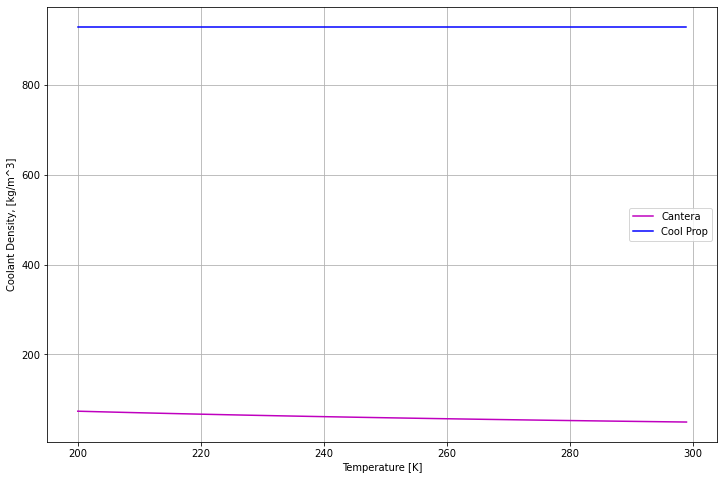

In [19]:
import os
import matplotlib.pyplot as plt
folder = "canteraplots/"
if not os.path.exists(folder):
        os.mkdir(folder)

# Plot results
fig, ax = plt.subplots(figsize=(12,8))
plt.grid()
plt.plot(T_list, rho_can, color="m", label="Cantera")
plt.plot(T_list, rho_cool, color="b", label="Cool Prop")
plt.legend()
ax.set_ylabel("Coolant Density, [kg/m^3]")
ax.set_xlabel("Temperature [K]")
plt.savefig(folder + "canteravscoolprop.png", dpi=300)

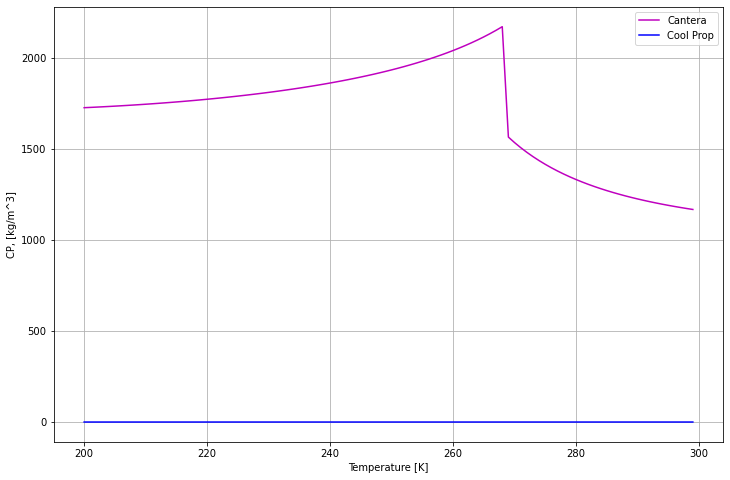

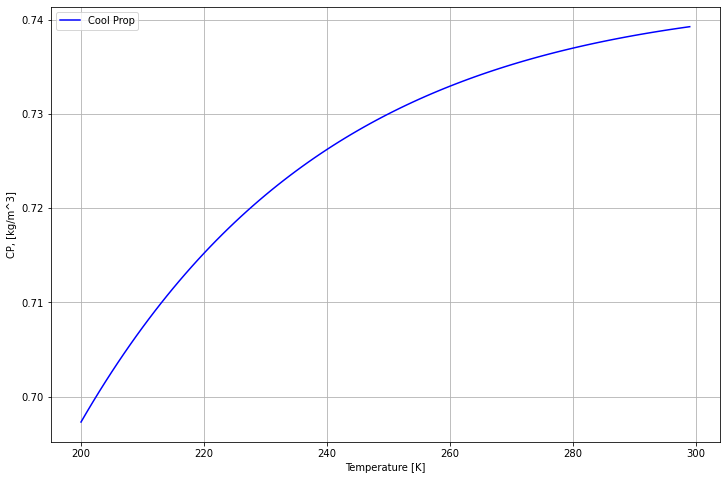

In [20]:
# Plot results
fig, ax = plt.subplots(figsize=(12,8))
plt.grid()
plt.plot(T_list, cp_can, color="m", label="Cantera")
plt.plot(T_list, cp_cool, color="b", label="Cool Prop")
plt.legend()
ax.set_ylabel("CP, [kg/m^3]")
ax.set_xlabel("Temperature [K]")
plt.savefig(folder + "canteravscoolprop.png", dpi=300)

fig, ax = plt.subplots(figsize=(12,8))
plt.grid()
plt.plot(T_list, cp_cool, color="b", label="Cool Prop")
plt.legend()
ax.set_ylabel("CP, [kg/m^3]")
ax.set_xlabel("Temperature [K]")
plt.savefig(folder + "canteravscoolprop.png", dpi=300)